# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [2]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [3]:
df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
print(df)
print(len(df))

      year                          name  rank           citizenship  \
0     2014          A. Jerrold Perenchio   663         United States   
1     2014            Abdulla Al Futtaim   687  United Arab Emirates   
2     2014  Abdulla bin Ahmad Al Ghurair   305  United Arab Emirates   
3     2014             Abdullah Al Rajhi   731          Saudi Arabia   
4     2014              Abdulsamad Rabiu  1372               Nigeria   
...    ...                           ...   ...                   ...   
1648  2014                     Zhu Yicai  1154                 China   
1649  2014                 Ziyad Manasir   609                Russia   
1650  2014            Ziyaudin Magomedov  1372                Russia   
1651  2014                  Zong Qinghou    94                 China   
1652  2014            Zygmunt Solorz-Zak   446                Poland   

     countrycode  networthusbillion   selfmade              typeofwealth  \
0            USA                2.6  self-made             

In [5]:
num_rows, num_columns = df.shape

print("Number of rows", num_rows)
print("Number of columns", num_columns)


Number of rows 1653
Number of columns 30


In [6]:
column_names = df.columns
data_types = df.dtypes

for column_name, data_type in zip(column_names, data_types):
    print("Column", column_name)
    print("Data Type:", data_type)
    print()

Column year
Data Type: int64

Column name
Data Type: object

Column rank
Data Type: int64

Column citizenship
Data Type: object

Column countrycode
Data Type: object

Column networthusbillion
Data Type: float64

Column selfmade
Data Type: object

Column typeofwealth
Data Type: object

Column gender
Data Type: object

Column age
Data Type: float64

Column industry
Data Type: object

Column IndustryAggregates
Data Type: object

Column region
Data Type: object

Column north
Data Type: int64

Column politicalconnection
Data Type: float64

Column founder
Data Type: int64

Column generationofinheritance
Data Type: object

Column sector
Data Type: object

Column company
Data Type: object

Column companytype
Data Type: object

Column relationshiptocompany
Data Type: object

Column foundingdate
Data Type: float64

Column gdpcurrentus
Data Type: float64

Column sourceofwealth
Data Type: object

Column notes
Data Type: object

Column notes2
Data Type: object

Column source
Data Type: object

Colu

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [10]:
df2 = df.sort_values('networthusbillion', ascending=False)

print(df2.head(10))

      year              name  rank    citizenship countrycode  \
184   2014        Bill Gates     1  United States         USA   
226   2014  Carlos Slim Helu     2         Mexico         MEX   
79    2014    Amancio Ortega     3          Spain         ESP   
1562  2014    Warren Buffett     4  United States         USA   
862   2014     Larry Ellison     5  United States         USA   
339   2014        David Koch     6  United States         USA   
247   2014      Charles Koch     6  United States         USA   
1364  2014   Sheldon Adelson     8  United States         USA   
280   2014    Christy Walton     9  United States         USA   
724   2014        Jim Walton    10  United States         USA   

      networthusbillion   selfmade              typeofwealth  gender   age  \
184                76.0  self-made       founder non-finance    male  58.0   
226                72.0  self-made  privatized and resources    male  74.0   
79                 64.0  self-made       founder n

## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [12]:
gender_counts = df[df['gender'].isin(['female', 'male'])].groupby('gender')['gender'].count()

print(gender_counts)

gender
female     180
male      1473
Name: gender, dtype: int64


## 4b) What percent is that?

In [13]:
female_percentage = (df['gender'].value_counts(normalize=True) * 100)['female']

print(female_percentage)

10.88929219600726


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [14]:
females = df[df['gender'] == 'female']

males = df[df['gender'] == 'male']


average_wealth_female = females['networthusbillion'].median()
print(average_wealth_female)

average_wealth_male = males['networthusbillion'].median()
print(average_wealth_male)


2.3
2.1


## 5a) What is the most common source/type of wealth?

In [15]:
print(df['typeofwealth'].value_counts())

print(df['typeofwealth'].value_counts().head(1))


#wealth_source = data['typesofwealth'].value_counts()


#print(wealth_source)


typeofwealth
inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: count, dtype: int64
typeofwealth
inherited    506
Name: count, dtype: int64


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [16]:
print(females['typeofwealth'].value_counts())

print(males['typeofwealth'].value_counts())

wealth_counts = df.groupby('gender')['typeofwealth'].value_counts()
print(wealth_counts)

gender_counts = df['gender'].value_counts()
print(gender_counts)


most_common_wealth_type_for_men = wealth_counts.loc['male'].idxmax()
men_percentage = (wealth_counts.loc['male'] / gender_counts.loc['male']) * 100

most_common_wealth_type_for_women = wealth_counts.loc['female'].idxmax()
women_percentage = (wealth_counts.loc['female'] / gender_counts.loc['female']) * 100


print("Most common wealth type for men:", most_common_wealth_type_for_men)
print("Percentage for most common wealth type among men:", men_percentage[most_common_wealth_type_for_men], "%")
print("Most common wealth type for women:", most_common_wealth_type_for_women)
print("Percentage for most common wealth type among women:", women_percentage[most_common_wealth_type_for_women], "%")

typeofwealth
inherited                   142
founder non-finance          21
self-made finance             6
executive                     6
privatized and resources      5
Name: count, dtype: int64
typeofwealth
founder non-finance         446
inherited                   364
self-made finance           338
privatized and resources    187
executive                   136
Name: count, dtype: int64
gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: count, dtype: int64
gender
male      1473
female     180
Name: count, dtype: int64
Most common wealth type for men: founder non-finance
Percentage for most common 

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

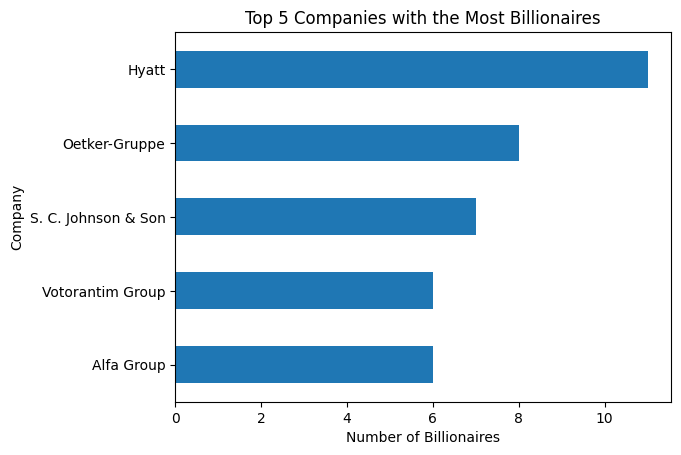

In [17]:
import matplotlib.pyplot as plt

# Group the data by company and count occurrences
company_counts = df['company'].value_counts().head(5)

#sort
company_counts = company_counts.sort_values()

# Create a horizontal bar graph of the top 5 companies
company_counts.plot(kind='barh')

plt.xlabel('Number of Billionaires')
plt.ylabel('Company')
plt.title('Top 5 Companies with the Most Billionaires')

plt.show()

## 7) How much money do these top 5 billionaires have in total?

In [49]:
sorted_df_wealth = data.sort_values('networthusbillion', ascending=False)

top_5_billionaires = sorted_df_wealth.head(5)
total_wealth_top_5 = top_5_billionaires['networthusbillion'].sum()

print(total_wealth_top_5,"billion")


318.2 billion


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [55]:
print(df.groupby('countrycode')['networthusbillion'].sum().sort_values(ascending=False).head(10))

# Group country by wealth and get sum
country_wealth = df.groupby('countrycode')['networthusbillion'].sum()

# Sort the country wealth in descending order
sorted_country_wealth = country_wealth.sort_values(ascending=False)

# Select the top 10 countries by total wealth
top_10_countries = sorted_country_wealth.head(10)

print("Top 10 countries by total wealth:")
print(top_10_countries)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64
Top 10 countries by total wealth:
countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64


## 9a) How old is an average billionaire?

In [56]:
average_age = data['age'].mean()

print("Average age of billionaires:", average_age)

Average age of billionaires: 63.34213836477988


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [87]:
print(df.groupby('selfmade')['age'].mean())

#print(df.groupby('age').mean())

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [115]:
#youngest
# print(df.sort_values('age').head(3))
# print(df.sort_values('age').head(3)['name', 'age'])

print(df.sort_values('age').head(3)[['name', 'age']])

#oldest
print(df.sort_values('age', ascending=False).head(3)[['name', 'age']])
# type(df)


                  name   age
1172       Perenna Kei  24.0
397   Dustin Moskovitz  29.0
1004   Mark Zuckerberg  29.0
                       name   age
343  David Rockefeller, Sr.  98.0
816           Karl Wlaschek  96.0
836          Kirk Kerkorian  96.0


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

(array([  8.,  18., 131., 250., 284., 336., 252., 186., 104.,  21.]),
 array([24. , 31.4, 38.8, 46.2, 53.6, 61. , 68.4, 75.8, 83.2, 90.6, 98. ]),
 <BarContainer object of 10 artists>)

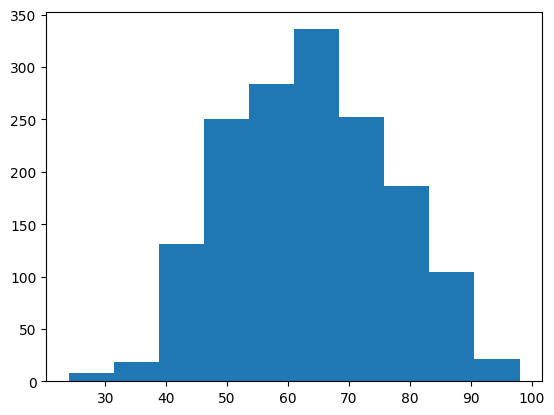

In [90]:
plt.hist(data['age'])

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

plt.scatter(data['age'], data['networthinusbilions'])


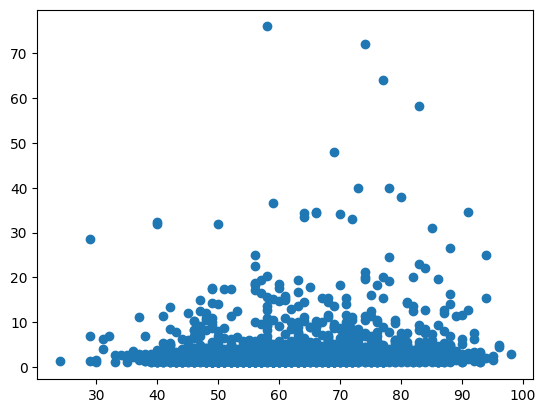

In [95]:
plt.scatter(df['age'], df['networthusbillion'])


## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<BarContainer object of 10 artists>

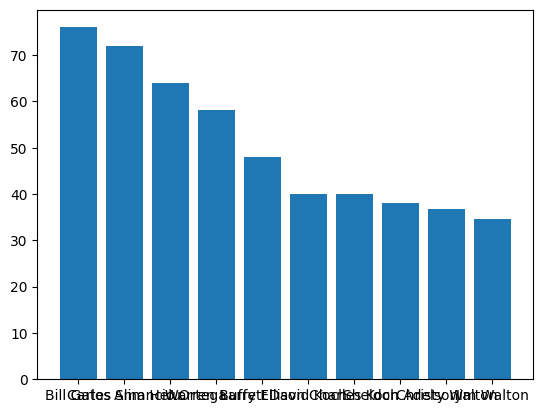

In [96]:
sorted_data = df.sort_values('networthusbillion', ascending=False)

top_10_richest = sorted_data.head(10)

# Create a bar graph of the top 10 richest billionaires
plt.bar(top_10_richest['name'], top_10_richest['networthusbillion'])
